In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [28]:
df = pd.read_csv('../datasets/epa_air_quality/c4_epa_air_quality.csv')
df.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [29]:
df.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


In [30]:
df.isnull().sum()

Unnamed: 0          0
date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
arithmetic_mean     0
aqi                 0
dtype: int64

In [31]:
df.dropna(inplace=True)

<Axes: xlabel='count', ylabel='state_name'>

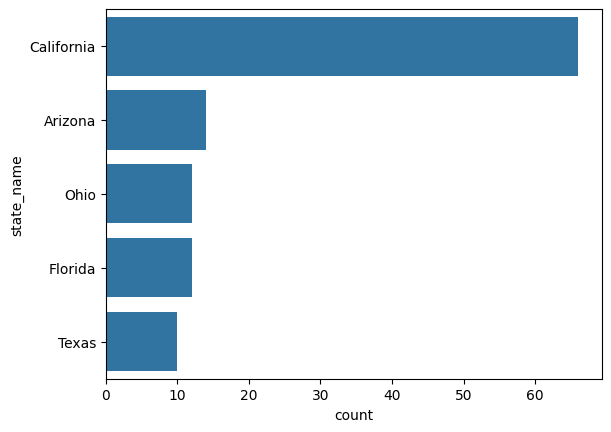

In [32]:
states=df['state_name'].value_counts()
# top 5 state name graph
sns.countplot(y='state_name', data=df, order=states.index[:5])

In [33]:
states

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania             9
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Oregon                   2
Montana                  2
Alaska                   2
Tennessee                2
Washington               2
Idaho                    2
Rhode Island     

In [34]:
ca_la= df[df['county_name'] == 'Los Angeles']
ca_other = df[(df['state_name']=='California') & (df['county_name']!='Los Angeles')]


In [35]:
significance_level = 0.05


*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.

In [36]:
stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)

TtestResult(statistic=2.1107010796372014, pvalue=0.049839056842410995, df=17.08246830361151)

With a p-value (0.049) being less than 0.05 (as your significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis.


In [37]:
ny = df[df['state_name']=='New York']
ohio = df[df['state_name']=='Ohio']

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


In [38]:
tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less', equal_var=False)
print(tstat)
print(pvalue)

-2.025951038880333
0.030446502691934683


With a p-value (0.030) of less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.036), **reject the null hypothesis in favor of the alternative hypothesis**.

In [39]:
michigan= df[df['state_name']=='Michigan']

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.

In [40]:
tstat,pvalue=stats.ttest_1samp(michigan['aqi'],10, alternative='greater')
print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


With a p-value (0.940) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.74), **fail to reject the null hypothesis**.